In [1]:
import pandas as pd
# set float print option to 3 decimal places, and define a percent format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
format_percent = lambda x: '{:.1f}%'.format(x * 100)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
sys.path.append('./analysis/')

%load_ext autoreload
%autoreload 2
import utils

In [2]:
lm_metadata = utils.load_annotated_lm_metadata()

In [3]:
lm_metadata['n_authors'] = lm_metadata['authors'].apply(lambda x: len(x))
lm_metadata = utils.convert_citations_to_ranks(lm_metadata)
lm_metadata.sample(5)

# Exclude very-recent papers, since they have had disparate amounts of time to accrue citations
# This date threshold can be revised for future iterations of the dataset
# This line should be commented out when looking at the top 50 cited papers in 2023
# lm_metadata = lm_metadata[lm_metadata['v1_date'] < '2023-07-01']

,id,authors,title,categories,abstract,versions,first_category,v1_date,LM_related_terms,mentions_LM_keyword,...,domains,industry,academic,above_pred_female_threshold,inferred_female_frac_nqg_uncertainty_threshold_0.100,citationCount,percentile_rank_in_3_month_window,percentile_rank_in_12_month_window,n_authors,percentile_rank_in_6_month_window
2695,arXiv:2009.09680,"[Haoyu Song, Yan Wang, Wei-Nan Zhang, Zhengyu ...",Profile Consistency Identification for Open-do...,[cs.CL],Maintaining a consistent attribute profile i...,"[{'version': 'v1', 'created': 'Mon, 21 Sep 202...",cs.CL,2020-09-21 08:38:23,[BERT],True,...,[hit.edu.cn],False,True,NaN,NaN,22.000,0.657,0.592,6,0.650
1666,arXiv:2003.11687,"[Jitin Krishnan, Patrick Coronado, Hemant Puro...",Common-Knowledge Concept Recognition for SEVA,"[cs.CL, cs.LG, stat.ML]",We build a common-knowledge concept recognit...,"[{'version': 'v1', 'created': 'Thu, 26 Mar 202...",cs.CL,2020-03-26 00:30:36,[language model],True,...,"[gmu.edu, nasa.gov]",False,True,False,0.000,1.000,0.056,0.070,4,0.056
16080,arXiv:2308.04241,"[Zhu Deng, Jinjie Liu, Biao Luo, Can Yuan, Qin...",AutoPCF: Efficient Product Carbon Footprint Ac...,"[cs.AI, cs.CY]",The product carbon footprint (PCF) is crucia...,"[{'version': 'v1', 'created': 'Tue, 8 Aug 2023...",cs.AI,2023-08-08 13:12:03,[language model],True,...,[alibaba-inc.com],True,False,False,0.000,0.000,0.354,0.228,8,0.354
6268,arXiv:2111.12158,"[Damien Bouchabou, Sao Mai Nguyen, Christophe ...",Using Language Model to Bootstrap Human Activi...,[cs.LG],Long Short Term Memory LSTM-based structures...,"[{'version': 'v1', 'created': 'Tue, 23 Nov 202...",cs.LG,2021-11-23 21:21:14,[language model],True,...,"[imt-atlantique.fr, deltadore.com]",False,False,False,0.000,10.000,0.637,0.556,5,0.613
3737,arXiv:2101.11716,"[Dennis Müller, Cezary Kaliszyk]",Disambiguating Symbolic Expressions in Informa...,[cs.LG],We propose the task of disambiguating symbol...,"[{'version': 'v1', 'created': 'Mon, 25 Jan 202...",cs.LG,2021-01-25 10:14:37,[language model],True,...,"[kwarc.info, uibk.ac.at]",False,False,False,0.000,0.000,0.032,0.041,2,0.033


## Descriptive stats of top-cited papers

In [4]:
# Compare mean and median author counts for papers in the top decile with papers in the bottom decile
# use the column 'percentile_rank_in_3_month_window' to rank papers into deciles

top_decile = lm_metadata[lm_metadata['percentile_rank_in_3_month_window'] >= 0.9]
bottom_decile = lm_metadata[lm_metadata['percentile_rank_in_3_month_window'] <= 0.1]

print('Mean team size for top decile papers: ', top_decile['n_authors'].mean())
print('Mean team size for bottom decile papers: ', bottom_decile['n_authors'].mean())
print('Median team size for top decile papers: ', top_decile['n_authors'].median())
print('Median team size for bottom decile papers: ', bottom_decile['n_authors'].median())

Mean team size for top decile papers:  8.27962962962963
Mean team size for bottom decile papers:  3.5454545454545454
Median team size for top decile papers:  6.0
Median team size for bottom decile papers:  3.0


In [6]:
# Print the average percentile delta between industry papers and academic papers

industry_papers = lm_metadata[lm_metadata['industry']]
academic_papers = lm_metadata[lm_metadata['academic']]

print('Mean percentile delta between industry and academic papers:', format_percent(industry_papers.percentile_rank_in_3_month_window.mean() - academic_papers.percentile_rank_in_3_month_window.mean()))
print('Medians: industry citation count, academic citation count, delta(industry, academic):', industry_papers.citationCount.median(), academic_papers.citationCount.median(), industry_papers.citationCount.median() - academic_papers.citationCount.median())
print('Means: industry citation count, academic citation count, delta(industry, academic):', industry_papers.citationCount.mean(), academic_papers.citationCount.mean(), industry_papers.citationCount.mean() - academic_papers.citationCount.mean())

Mean percentile delta between industry and academic papers: 6.4%
Medians: industry citation count, academic citation count, delta(industry, academic): 8.0 5.0 3.0
Means: industry citation count, academic citation count, delta(industry, academic): 78.14322766570605 29.45210856886496 48.69111909684109


In [7]:
# Print total share of citations of industry-affiliated papers vs academic-affiliated papers

papers_with_affiliation = lm_metadata[lm_metadata['industry'] | lm_metadata['academic']]

print('% of papers with industry affiliation: ', papers_with_affiliation.industry.sum() / len(papers_with_affiliation))
print('% of papers with academic affiliation: ', papers_with_affiliation.academic.sum() / len(papers_with_affiliation))
print('Share of citations of industry-affiliated papers: ', industry_papers.citationCount.sum() / papers_with_affiliation.citationCount.sum())
print('Share of citations of academic-affiliated papers: ', academic_papers.citationCount.sum() / papers_with_affiliation.citationCount.sum())

% of papers with industry affiliation:  0.3311416047265104
% of papers with academic affiliation:  0.8524871355060034
Share of citations of industry-affiliated papers:  0.6281740911228539
Share of citations of academic-affiliated papers:  0.6083389898044521


### Entire analysis period (2018-2023)

In [8]:
# Within the top-cited papers:
# Print mean author count.
# For papers with an affiliation ('industry' or 'academic' columns are True), print:
# - percent with industry affiliation
# - percent with academic affiliation
# - percent with both ('industry' and 'academic' are True)
# Print the value_counts of cluster column.
# Use utils.get_domain_counts_with_affiliation_type(lm_metadata) and print the top 10 affiliations.
# Everything should be formatted to 2 decimal places, and outputted as percents where applicable.

def print_top_cited_affiliation_statistics(df, top_frac=0.1, citation_col='percentile_rank_in_3_month_window', print_top_topics=False):
    n_top_cited = int(df.shape[0] * top_frac)
    top_cited_df = df.sort_values(citation_col, ascending=False).head(n_top_cited).copy()
    print(f'Analyzing the top {n_top_cited} cited papers vs. the {df.shape[0]} papers in total.\n')

    print('Mean author count overall vs. top-cited: {:.2f} vs. {:.2f}'.format(df['n_authors'].mean(), top_cited_df['n_authors'].mean()))
    print('Median author count overall vs. top-cited: {:.2f} vs. {:.2f}'.format(df['n_authors'].median(), top_cited_df['n_authors'].median()))
    print()

    print('Percent of papers with an affiliation overall vs. top-cited:',
            format_percent(df[(df['industry'] == True) | (df['academic'] == True)].shape[0] / df.shape[0]),
            'vs.',
            format_percent(top_cited_df[(top_cited_df['industry'] == True) | (top_cited_df['academic'] == True)].shape[0] / top_cited_df.shape[0]))
    
    total_with_affiliation_all = df[(df['industry']) | (df['academic'])].shape[0]
    total_with_affiliation_top = top_cited_df[(top_cited_df['industry']) | (top_cited_df['academic'])].shape[0]
    print("Considering papers with an affiliation only:")
    print('Percent with industry affiliation overall vs. top-cited:', format_percent(df['industry'].sum() / total_with_affiliation_all), 'vs.', format_percent(top_cited_df['industry'].sum() / total_with_affiliation_top))
    print('Percent with academic affiliation overall vs. top-cited:', format_percent(df['academic'].sum() / total_with_affiliation_all), 'vs.', format_percent(top_cited_df['academic'].sum() / total_with_affiliation_top))
    print('Percent with industry-academic collaboration overall vs. top-cited:',
            format_percent(df[(df['industry'] == True) & (df['academic'] == True)].shape[0] / total_with_affiliation_all),
            'vs.',
            format_percent(top_cited_df[(top_cited_df['industry'] == True) & (top_cited_df['academic'] == True)].shape[0] / total_with_affiliation_top))
    
    if print_top_topics:
        print()
        print('Cluster value counts for top-cited papers:')
        print(top_cited_df['cluster'].value_counts().head(10))
        print()


In [9]:
print_top_cited_affiliation_statistics(lm_metadata, top_frac=0.1, print_top_topics=True)

Analyzing the top 1514 cited papers vs. the 15147 papers in total.

Mean author count overall vs. top-cited: 4.90 vs. 8.13
Median author count overall vs. top-cited: 4.00 vs. 6.00

Percent of papers with an affiliation overall vs. top-cited: 69.3% vs. 74.2%
Considering papers with an affiliation only:
Percent with industry affiliation overall vs. top-cited: 33.1% vs. 49.0%
Percent with academic affiliation overall vs. top-cited: 85.2% vs. 74.6%
Percent with industry-academic collaboration overall vs. top-cited: 18.4% vs. 23.7%

Cluster value counts for top-cited papers:
LLMs, Reasoning, Chain-of-Thought       119
Efficiency & Performance                107
Vision-Language Models                  101
Applications of LLMs/ChatGPT             68
Prompts & In-Context Learning            65
Pretrained LMs & Text Classification     63
Video & Multimodal Models                57
Representations, Syntax, Semantics       54
Knowledge Graphs and Commonsense         52
NLP for Healthcare         

### 2023 vs 2018-2022

In [10]:
# Now perform the same analysis as above, but look only at 2023 papers.

# 2023 papers should exclude the last window, since there still isn't enough time to compare citation counts
lm_metadata_2023 = lm_metadata[(lm_metadata['v1_date'].dt.year == 2023) & (lm_metadata['v1_date'] < '2023-07-01')].copy()

print_top_cited_affiliation_statistics(lm_metadata_2023, top_frac=0.02)

Analyzing the top 91 cited papers vs. the 4595 papers in total.

Mean author count overall vs. top-cited: 5.26 vs. 11.75
Median author count overall vs. top-cited: 5.00 vs. 8.00

Percent of papers with an affiliation overall vs. top-cited: 67.9% vs. 69.2%
Considering papers with an affiliation only:
Percent with industry affiliation overall vs. top-cited: 26.7% vs. 46.0%
Percent with academic affiliation overall vs. top-cited: 89.5% vs. 74.6%
Percent with industry-academic collaboration overall vs. top-cited: 16.1% vs. 20.6%


In [11]:
# Now perform the same analysis as above, but look only at pre-2023 papers (2018-2022).

lm_metadata_pre_2023 = lm_metadata[(lm_metadata['v1_date'].dt.year < 2023)].copy()

print_top_cited_affiliation_statistics(lm_metadata_pre_2023, top_frac=0.02)

Analyzing the top 211 cited papers vs. the 10552 papers in total.

Mean author count overall vs. top-cited: 4.74 vs. 14.88
Median author count overall vs. top-cited: 4.00 vs. 7.00

Percent of papers with an affiliation overall vs. top-cited: 69.9% vs. 75.8%
Considering papers with an affiliation only:
Percent with industry affiliation overall vs. top-cited: 35.8% vs. 61.9%
Percent with academic affiliation overall vs. top-cited: 83.5% vs. 57.5%
Percent with industry-academic collaboration overall vs. top-cited: 19.3% vs. 19.4%


#### Of the top-cited papers from 2023, how many are written by new-to-LLM vs. experienced-with-LLM first authors?

In [35]:
n_top_cited = int(lm_metadata_2023.shape[0] * 0.02) # top 2%
top_cited_2023 = lm_metadata_2023.sort_values('percentile_rank_in_3_month_window', ascending=False).head(n_top_cited).copy()

pre_2023_lm_authors = utils.get_experienced_llm_authors(lm_metadata)

# Of the top-cited papers from 2023, how many are written by first authors who are in pre_2023_lm_authors? (experienced)

lm_metadata_2023['experienced_first_author'] = lm_metadata_2023['authors'].apply(lambda x: x[0] in pre_2023_lm_authors)
lm_metadata_2023['experienced_last_author'] = lm_metadata_2023['authors'].apply(lambda x: x[-1] in pre_2023_lm_authors)
top_cited_2023['experienced_first_author'] = top_cited_2023['authors'].apply(lambda x: x[0] in pre_2023_lm_authors)
top_cited_2023['experienced_last_author'] = top_cited_2023['authors'].apply(lambda x: x[-1] in pre_2023_lm_authors)

print('Percent of 2023 papers with experienced first author, overall vs. top-cited:',
        format_percent(lm_metadata_2023['experienced_first_author'].mean()),
        'vs.',
        format_percent(top_cited_2023['experienced_first_author'].mean()))
print('Percent of 2023 papers with experienced last author, overall vs. top-cited:',
        format_percent(lm_metadata_2023['experienced_last_author'].mean()),
        'vs.',
        format_percent(top_cited_2023['experienced_last_author'].mean()))


Number of total co-authors on LLM papers: 84270
Number of total co-authors on LLM papers before 2023-01-01: 24789
Percent of 2023 papers with experienced first author, overall vs. top-cited: 41.5% vs. 54.9%
Percent of 2023 papers with experienced last author, overall vs. top-cited: 64.7% vs. 74.7%


### Get the top few papers in each 3-month bucket for qualitative analysis

In [36]:
# Get the top few papers in each 3-month bucket for qualitative analysis

date_intervals_3month = list(pd.interval_range(start=utils.ANALYSIS_START_DATE, end=lm_metadata['v1_date'].max(), freq=f'3MS', closed='left'))
date_intervals_3month.append(pd.Interval(date_intervals_3month[-1].right, lm_metadata['v1_date'].max(), closed='left'))

k_papers_per_interval = 5
top_k_papers_per_interval = []
for interval in date_intervals_3month:
    top_k_papers_per_interval.append(lm_metadata[(lm_metadata['v1_date'] >= interval.left) & (lm_metadata['v1_date'] < interval.right)].sort_values('citationCount', ascending=False).head(k_papers_per_interval))

top_k_papers_per_interval = pd.concat(top_k_papers_per_interval)
print(top_k_papers_per_interval.cluster.map(utils.cluster_abbrevs_for_plotting).value_counts())

# Write to CSV in ./analysis/top_cited_papers/top_5_papers_per_3month_interval.csv
top_k_papers_per_interval.to_csv('./analysis/top_cited_papers/top_5_papers_per_3month_interval.csv')

Efficiency & Performance                13
BERT & Embeddings                       11
Vision-Language Models                  10
Pretrained LMs & Text Classification    10
Reasoning & Chain-of-Thought             8
Prompts & In-Context Learning            7
Fine-Tuning & Domain Adaptation          5
Multilingual Transfer Learning           5
Knowledge Graphs & Commonsense           4
Transformer/RNN Architectures            4
Speech Recognition                       4
Video & Multimodal Models                3
NLP for Healthcare                       3
Applications of LLMs/ChatGPT             3
Dialogue & Conversational AI             2
Interpretability & Reasoning             2
Societal Implications of LLMs            2
Summarization & Evaluation               2
Search & Retrieval                       2
Code Generation                          2
Entity Extraction & RecSys               2
Translation & Low-Resource               2
Knowledge Distillation                   2
Text Genera

In [39]:
# # Print the top 50 cited papers from 2023 by percentile rank
# print(lm_metadata_2023.sort_values('percentile_rank_in_3_month_window', ascending=False).head(50).head(50).cluster.value_counts())

# Top 50 by raw citation count
top_50_2023 = lm_metadata_2023.sort_values('citationCount', ascending=False).head(50)
print(top_50_2023.cluster.value_counts())

# Write to CSV in ./analysis/top_cited_papers/top_50_cited_papers_from_2023.csv
top_50_2023.to_csv('./analysis/top_cited_papers/rawCount_top_50_cited_papers_from_2023.csv')

Applications of LLMs/ChatGPT              12
Vision-Language Models                     7
LLMs, Reasoning, Chain-of-Thought          6
Software, Planning, Robotics               3
Human Feedback & Interaction               3
Applications and Benchmark Evaluations     3
Fine-Tuning & Domain Adaptation            2
Code Generation                            2
Video & Multimodal Models                  2
Prompts & In-Context Learning              1
NLP for Healthcare                         1
Pretrained LMs & Text Classification       1
Privacy & Adversarial Risks                1
Societal Implications of LLMs              1
Efficiency & Performance                   1
Finance Applications                       1
Speech Recognition                         1
Summarization and Evaluation               1
Datasets & Benchmarks                      1
Name: cluster, dtype: int64


## n_authors vs. citation percentile

In [43]:
# # Uncomment below if only running this section
# lm_metadata = utils.load_annotated_lm_metadata() 

# Exclude papers since 2023-07-01, since there is significant disparity in how long they've had to accrue citations
lm_metadata = lm_metadata[lm_metadata['v1_date'] < '2023-07-01']
print(lm_metadata.shape)

(15147, 19)


### citation percentile as indep variable, n_authors as dep variable

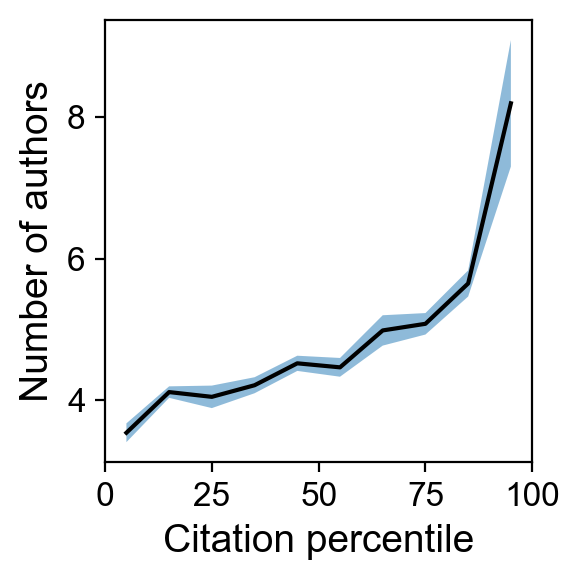

In [9]:
# Plot percentile of citations vs. number of authors, using the column 'percentile_rank_in_12_month_window'
# x-axis should be percentile of citations, y-axis is number of authors

percentile_bins = np.linspace(0, 1, 11) # Deciles of citation percentile

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3), dpi=200)
axs = [axs]
# f, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), dpi=200)
# for (i, month_window_size) in enumerate([3, 6, 12]):
for (i, month_window_size) in enumerate([3]):
    papers = lm_metadata.copy()

    # Map each paper to the middle of its percentile bin, where the bins are e.g. [0, 0.1], [0.1, 0.2], ...
    # Aggregating papers to bins allows us to compute the average number of authors in each bin
    papers['percentile_bin'] = pd.cut(papers[f'percentile_rank_in_{month_window_size}_month_window'], bins=percentile_bins)
    papers['percentile_bin'] = papers['percentile_bin'].apply(lambda x: x.mid)

    # Compute the average number of authors in each percentile bin
    group_by_percentile_bin = papers.groupby('percentile_bin')['n_authors']
    mean_n_authors = group_by_percentile_bin.mean()
    std_n_authors = group_by_percentile_bin.std()
    bin_size = group_by_percentile_bin.size()
    cis_lower = mean_n_authors - 1.96*std_n_authors/np.sqrt(bin_size)
    cis_upper = mean_n_authors + 1.96*std_n_authors/np.sqrt(bin_size)

    # Plot the average number of authors in each percentile bin, with 95% CI of the mean
    ax = axs[i]
    percentile_bin_midpoints = 0.5*(percentile_bins[:-1] + percentile_bins[1:])
    ax.plot(100*percentile_bin_midpoints, mean_n_authors, color='black')
    ax.fill_between(100*percentile_bin_midpoints, cis_lower, cis_upper, alpha=0.5)
    # Set tick fontsize to 10
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Citation percentile', fontsize=14)
    ax.set_ylabel('Number of authors', fontsize=14)
    # ax.set_title(f'{month_window_size}-month rank window', fontsize=14)
    
    # Place xticks at 0, 50, 100
    ax.set_xticks([0, 25, 50, 75, 100])

plt.tight_layout()
plt.show()


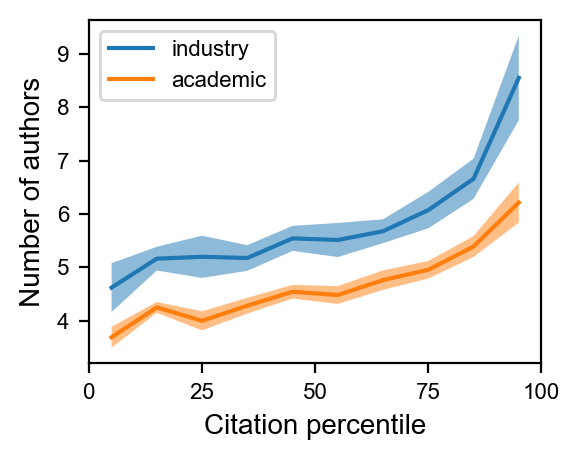

In [15]:
# Regenerate the plot, except add lines for industry/academia 

percentile_bins = np.linspace(0, 1, 11)

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.4), dpi=200)
axs = [axs]
# f, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), dpi=200)
# for (i, month_window_size) in enumerate([3, 6, 12]):
for (i, month_window_size) in enumerate([3]):
    # for subset in ['all', 'industry', 'academic']:
    for subset in ['industry', 'academic']:
        if subset == 'all':
            papers = lm_metadata.copy()
        elif subset == 'industry':
            papers = lm_metadata[lm_metadata['industry']].copy()
        elif subset == 'academic':
            papers = lm_metadata[lm_metadata['academic']].copy()

        papers['percentile_bin'] = pd.cut(papers[f'percentile_rank_in_{month_window_size}_month_window'], bins=percentile_bins)
        papers['percentile_bin'] = papers['percentile_bin'].apply(lambda x: x.mid)

        # Compute the average number of authors in each percentile bin
        group_by_percentile_bin = papers.groupby('percentile_bin')['n_authors']
        mean_n_authors = group_by_percentile_bin.mean()
        std_n_authors = group_by_percentile_bin.std()
        bin_size = group_by_percentile_bin.size()
        cis_lower = mean_n_authors - 1.96*std_n_authors/np.sqrt(bin_size)
        cis_upper = mean_n_authors + 1.96*std_n_authors/np.sqrt(bin_size)

        # Plot the average number of authors in each percentile bin, with 95% CI of the mean
        # plt.figure(figsize=(4, 3), dpi=200)
        # ax = plt.gca()
        ax = axs[i]
        percentile_bin_midpoints = 0.5*(percentile_bins[:-1] + percentile_bins[1:])
        ax.plot(100*percentile_bin_midpoints, mean_n_authors, label=subset)
        ax.fill_between(100*percentile_bin_midpoints, cis_lower, cis_upper, alpha=0.5)
        # Set tick fontsize to 10
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.set_xlabel('Citation percentile', fontsize=10)
        ax.set_ylabel('Number of authors', fontsize=10)
        # ax.set_title(f'{month_window_size}-month rank window', fontsize=14)
        ax.set_xticks([0, 25, 50, 75, 100])
        
    ax.legend(fontsize=8)

plt.tight_layout()

f.savefig('./analysis/figures/author_count_vs_citation_percentile.pdf', 
          bbox_inches='tight', dpi=300)
plt.show()


## Enriched topics in top-cited papers

In [16]:
for percentile_cutoff in [0.9, 0.95]:
    key_name = f'top_citation_percentile_{percentile_cutoff}'
    lm_metadata[key_name] = (lm_metadata[f'percentile_rank_in_3_month_window'] >= percentile_cutoff)

Chi2 test for Social Media & Misinformation: p = 3.740e-08 (not multiple hypothesis corrected)
Chi2 test for Emotion & Sentiment Analysis: p = 1.106e-05 (not multiple hypothesis corrected)
Chi2 test for Legal & Scientific Documents: p = 5.062e-03 (not multiple hypothesis corrected)
Chi2 test for Speech Recognition: p = 3.014e-08 (not multiple hypothesis corrected)
Chi2 test for Toxicity & Hate Speech: p = 3.926e-03 (not multiple hypothesis corrected)
Chi2 test for Prompts & In-Context Learning: p = 1.304e-05 (not multiple hypothesis corrected)
Chi2 test for Visual Foundation Models: p = 6.579e-04 (not multiple hypothesis corrected)
Chi2 test for Human Feedback & Interaction: p = 4.979e-07 (not multiple hypothesis corrected)
Chi2 test for Vision-Language Models: p = 1.052e-22 (not multiple hypothesis corrected)
Chi2 test for Reasoning & Chain-of-Thought: p = 3.960e-28 (not multiple hypothesis corrected)


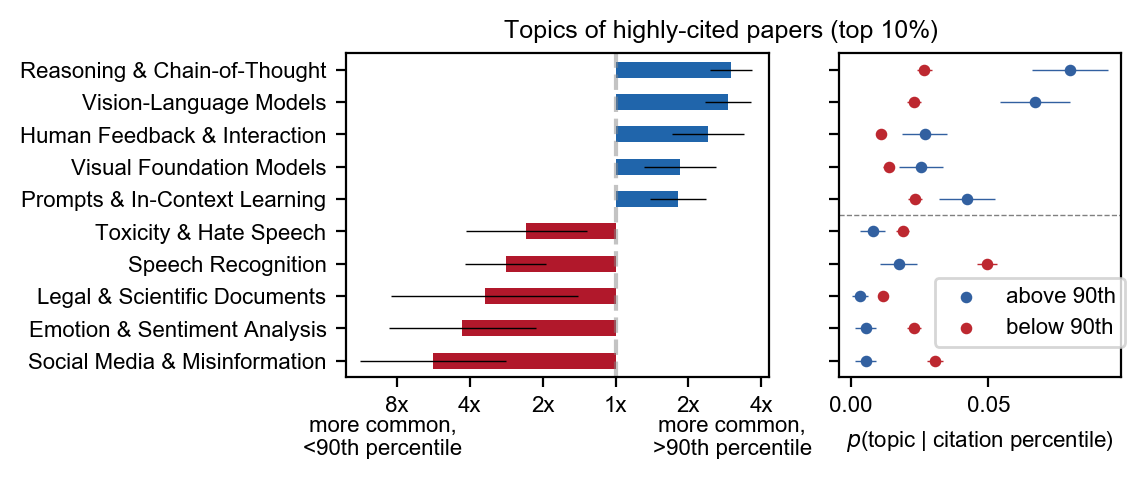

In [17]:
for percentile_cutoff in [0.9]:
    key_name = f'top_citation_percentile_{percentile_cutoff}'
    highly_cited_df = utils.get_topic_counts_by_binary_variable(lm_metadata, key_name)

    # Enforce that entries that will be plotted have at least 5 papers in the positive set
    # And p_chi2 < 1e-2
    highly_cited_df = highly_cited_df[(highly_cited_df['count_true'].apply(lambda x: x[0]) >= 5) & (highly_cited_df['p_chi2'] < 1e-2)]

    percentile_integer = int(100*percentile_cutoff)
    f, (enrich_ax, dot_ax) = utils.enrichment_plot_and_dotplot(
        highly_cited_df,
        bar_names_col='topic',
        neg_label=f'more common,\n<{percentile_integer}th percentile',
        pos_label=f'more common,\n>{percentile_integer}th percentile',
        true_label=f'above {percentile_integer}th',
        false_label=f'below {percentile_integer}th',
        legend_coords=(0.3, 0.34),
        manual_enrichment_xlim = (3.7, 2.1),
        dpi=200,
        dotplot_xlabel=r'$p$(topic | citation percentile)'
    )

    f.suptitle(f"Topics of highly-cited papers (top {100 - percentile_integer}%)", 
               y=0.96, fontsize=9)

    f.savefig(f'./analysis/figures/topic_barplot_highly_cited.pdf', bbox_inches='tight', dpi=300)
    plt.show()

In [18]:
highly_cited_df

,topic,ratio,count_true,count_false,p_topic_if_true,p_topic_if_false,p_chi2
16,"LLMs, Reasoning, Chain-of-Thought",2.988,"(119, 1490)","(365, 13657)",0.080,0.027,0.000
38,Vision-Language Models,2.910,"(100, 1490)","(315, 13657)",0.067,0.023,0.000
12,Human Feedback & Interaction,2.412,"(40, 1490)","(152, 13657)",0.027,0.011,0.000
39,Visual Foundation Models,1.843,"(38, 1490)","(189, 13657)",0.026,0.014,0.001
23,Prompts & In-Context Learning,1.816,"(63, 1490)","(318, 13657)",0.042,0.023,0.000
1,Applications of LLMs/ChatGPT,1.776,"(68, 1490)","(351, 13657)",0.046,0.026,0.000
11,Fine-Tuning & Domain Adaptation,1.721,"(49, 1490)","(261, 13657)",0.033,0.019,0.001
37,Video & Multimodal Models,1.648,"(57, 1490)","(317, 13657)",0.038,0.023,0.001
25,"Representations, Syntax, Semantics",0.542,"(52, 1490)","(879, 13657)",0.035,0.064,0.000
6,Dialogue & Conversational AI,0.445,"(22, 1490)","(453, 13657)",0.015,0.033,0.000


## Regression: look at effect of industry, controlling for author count

Uncontrolled, how much does industry affiliation increase chance of top citation decile?

In [96]:
papers_with_affiliation = lm_metadata[(lm_metadata['industry']) | (lm_metadata['academic'])].copy()
papers_with_affiliation['top_decile'] = (papers_with_affiliation['percentile_rank_in_3_month_window'] >= 0.9).astype(int)
papers_with_affiliation['industry_only'] = (papers_with_affiliation['industry'] & (~papers_with_affiliation['academic']))
papers_with_affiliation['academic_only'] = (papers_with_affiliation['academic'] & (~papers_with_affiliation['industry']))

In [97]:
# p(top_decile | industry_only)
print(papers_with_affiliation[papers_with_affiliation['industry_only']]['top_decile'].mean())

# p(top_decile | academic_only)
print(papers_with_affiliation[papers_with_affiliation['academic_only']]['top_decile'].mean())

# p(top_decile | industry_only) / p(top_decile | academic_only)
print(papers_with_affiliation[papers_with_affiliation['industry_only']]['top_decile'].mean() / papers_with_affiliation[papers_with_affiliation['academic_only']]['top_decile'].mean())


0.18087855297157623
0.07992591537256019
2.263077652954534


In [107]:
# Regress top_decile on industry_only and n_authors
import statsmodels.api as sm
from statsmodels.formula.api import ols

# papers_with_affiliation['n_authors_capped'] = papers_with_affiliation['n_authors'].apply(lambda x: min(x, 5))
# papers_with_affiliation['n_authors_capped'] = papers_with_affiliation['n_authors_capped'].astype(int)

model = sm.Logit.from_formula('top_decile ~ industry_only + academic_only + n_authors', data=papers_with_affiliation).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.315015
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             top_decile   No. Observations:                10494
Model:                          Logit   Df Residuals:                    10490
Method:                           MLE   Df Model:                            3
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                 0.06291
Time:                        05:39:57   Log-Likelihood:                -3305.8
converged:                       True   LL-Null:                       -3527.7
Covariance Type:            nonrobust   LLR p-value:                 7.023e-96
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.7664      0.092    -29.959      0.000      -2.947      -2.

In [110]:
print("Increased likelihood of industry-only papers vs. academic-only papers to be in the top decile:")
print(np.exp(0.2644 + 0.3769))

Increased likelihood of industry-only papers vs. academic-only papers to be in the top decile:
1.8989479076690445
